# Solução numérica do movimento oscilatório

C. Silva de Farias

[carlene.silva.078@ufrn.edu.br]

Faz um tempo que voltei a praticar programação revisando alguns problemas simples da disciplina de Física Computacional I que cursei na minha graduação, *back in* 2008 (já tem bastante tempo!). Um dos problemas mais interessantes vistos nessa disciplina diz respeito ao estudo de oscilações. Que discutiremos neste artigo. Este problema é interessante por dois motivos: o primeiro motivo é que o oscilador harmônico é discutido quase que durante toda a graduação de física desde os cursos de física básica I até mecânica quântica e mecânica estatística; o segundo motivo se deve ao fato de ser um problema relativamente simples de resolver do ponto de vista númerico, porque envolve a solução de uma equação diferencial ordinária, e os métodos para resolver tais problemas são relativamente simples. Caso você ainda não tenha visto o problema de oscilações no seu curso de mecânica, sugiro consultar a blibliografia de apoio sugerida no final deste artigo. Vamos lá!

## Movimento harmônico simples

Os fenômenos ondulatórios estão presentes em diversas áreas da física que incluem desde o movimento de moléculas em um sólido que oscilam em torno de sua posição de equilíbrio, até as ondas eletromagnéticas como as de luz, o radar e as ondas de rádio rádio, que são caracterizadas por campos eletromagnéticos oscilantes. Até mesmo os circuitos de corrente alternada, como o que alimenta a sua casa, são sistemas oscilantes onde as voltagens e as correntes elétricas variam com o tempo. Nesse post, vamos analisar um sistema mecânico bem simples que exibe movimento oscilatório: o pêndulo simples. Muitas das características desse sistema simplificado podem ser estendias aos exemplos dados anteriormente. Porém, como veremos mais adiante, a situação mais interessante acontece quando passamos a abordar o problema mais realístico, quando adicionamos força de atrito (força dissipativa) e uma força externa que mantém a oscilação do pêndulo. Veremos mais adiante que nesses casos, é possível que o sistema torne-se caótico. No entanto, a situação de caos descrita pelo pêndulo será totalmente determinística, o que quer dizer que seu estado ainda dependerá das condições iniciais do problema.

O pendulo simples consiste num sistema onde um objeto, digamos uma esfera de massa especifica $m$ está conectado a uma corda de comprimento $l$, presa em algum suporte, na vertical, veja a figura abaixo. Esse esse sistema como um todo (massa+corda) tem a capacidade de executar oscilações em reposta a uma força aplicada. Em condições ideais, onde desprezamos o atrito com o ar e assumindo que o ângulo que a corda faz com a linha vertical imaginaria é pequeno, esse sistema descreverá o que chamamos de movimento harmônico simples. A força restauradora que surge nesse sistema é tangencial ao arco do angulo $\theta$, e pode ser escrita da seguinte maneira
\begin{equation}
F_{\theta}=-mg\sin(\theta).
\end{equation}
Nessa expressão, $g$ é a aceleração da gravidade e $m$ é a massa da partícula. O sinal de menos serve para nos lembrar que a força restauradora é sempre oposta ao descolamento do pêndulo em relação a linha vertical imaginária, onde $\theta=0$.  

<img src="pendulo.svg" alt="Drawing" style="width: 350px; height: 350px;"/>

Podemos usar a segunda lei de Newton, e obter a equação de movimento para o pendulo, lembrando que o deslocamento é dado pelo arco do angulo $s= \theta l$, onde $l$ é o comprimento da corda. Assim,
\begin{equation}
F_{\theta}=m\frac{d^{2}s}{dt^2}=-mg\sin(\theta).
\end{equation}
Logo,
\begin{equation}
\frac{d^{2}\theta}{dt^{2}}=-\frac{g}{l}\sin(\theta).
\end{equation}
No limite de pequenas oscilações, podemos fazer $\sin(\theta)\approx\theta$.

A aproximação numerica do problema consiste em resolver uma equação diferencial ordinaria de segunda ordem para a o deslocamento $\theta(t)$. Para tando, vamos usar o método de Euler-Cromer que considera a aproximação de uma função qualquer $f$ por sua série de Taylor.

\begin{equation}
f(\Delta t)= f(0)+\frac{df}{dt}\Delta t+ \frac{1}{2}\frac{d^2 f}{dt^2}(\Delta t)^{2}+...
\end{equation}

Observamos que,
\begin{align}
\frac{d\theta}{dt}&=\omega,\\
\frac{d\omega}{dt}&= -\frac{g}{l}\theta,
\end{align}
são respectivamente as taxas de variação da frequência angular $\omega(t)$ e do arco do ângulo $\theta(t)$ no tempo. Sendo assim, o que precisamos fazer agora é escrever ambas as funções como diferenças finitas da seguinte maneira
\begin{align}
\omega_{i+1}&=\omega_{i} -\frac{g}{l}\theta_{i} \Delta t\\
\theta_{i+1}&=\theta_{i} +\omega_{i+1}\Delta t
\end{align}


A seguir temos o programa escrito em linguagem python que podem ser facilmente executado no python, se você usa Linux ou com o anaconda e o jupyter notebook instalados. A vantagem do jupyter é que ele pode ser usado para mais de uma linguagem- se você programa em outra linguagem que não python-, e, além disso, você pode colocar tanto o programa quanto o script para visualizar os resultados no mesmo notebook.

In [15]:
#*****************************************************************************************************
# nome: oscilation.py
# descrição: Oscilatory Motion
# last updated: 23/03/2021
# Written by C. Silva de Farias
#*******************************************************************************************************/

# import necessary lybraries
from math import pi, cos, sin, sqrt


#defining necessary constants
m = 1.0     #mass of the pendulum
l = 1.0     #length of the pendulo
g = 9.8     #gravity acceleration
dt = 0.01    #time step

#defining arrays to store step, time, position, velocity, and energy.
t = []
theta = []
omega = []
E = []

#initial conditions 
t0 = 0.0
n0 = 0.0
x0 = 0.2
v0 = 0.0

for n0 in range(0,1000):
    #print(t0,x0,v0)
    n_next = n0+1
    n0 = n_next

    t_next = t0 + dt
    t0 = t_next

    v_next = v0 - (g/l) * x0 * dt
    x_next = x0 +v_next*dt

    x0 = x_next
    v0 = v_next
  
    Energy = (0.5)*m*l*l*(v0*v0 + (g/l) * x0*x0);

    theta.append(x0)
    omega.append(v0)
    t.append(t0)
    E.append(Energy)

No bloco a seguir, temos um *script* que plota os resultados obtidos a partir da nossa rotina "osc_EC.c" escrito em linguagem python.

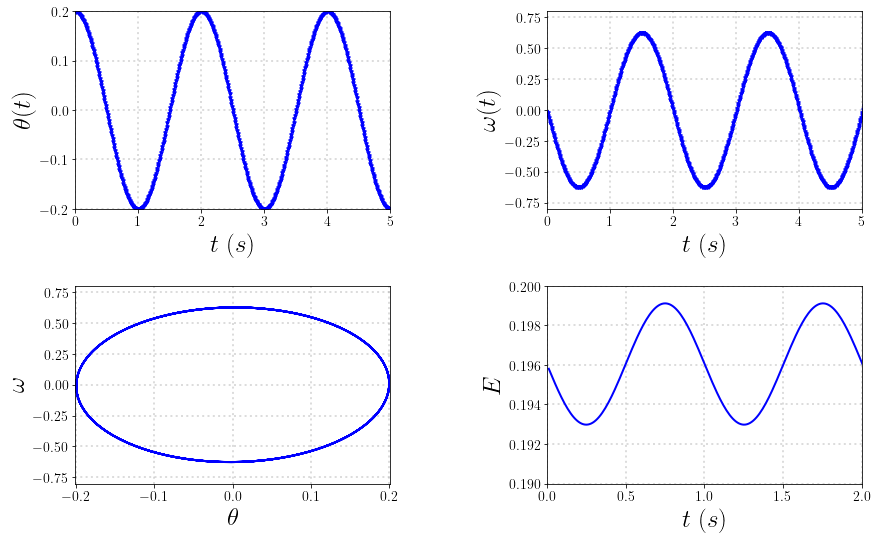

In [12]:
#visualizing results

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


mpl.rc('text', usetex=True)
mpl.rc('font', family='serif', weight = 'normal', style = 'normal',size = '14')

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 12,
        }
# make these smaller to increase the resolution
dx, dy = 0.10, 0.10

#customizando o gráfico

fig1 = plt.figure(figsize = (13,8))
plt.subplots_adjust(top=0.96, bottom=0.14, left=0.14, right=0.98, wspace=0.5, hspace=0.39)
#subplot(nrows, ncols, index, **kwargs)
ax1 = fig1.add_subplot(2,2,1)
ax2 = fig1.add_subplot(2,2,2)
ax3 = fig1.add_subplot(2,2,3)
ax4 = fig1.add_subplot(2,2,4)


ax1.grid(b=True, which='major', color='DarkGray', alpha=0.4, linestyle=':', linewidth=2)
ax1.set_xlim([0.0,5.0])
ax1.set_ylim([-0.2,0.2])
ax1.set_ylabel("$\\theta(t)$ ",fontsize=25)
ax1.set_xlabel('$t \ (s)$',fontsize=25)
ax1.plot(t,theta,'-*', color='Blue', lw=1, ms=4,markevery=1)

ax2.grid(b=True, which='major', color='DarkGray', alpha=0.4, linestyle=':', linewidth=2)
ax2.set_xlim([0.0,5.0])
ax2.set_ylim([-0.8,0.8])
ax2.set_ylabel("$\\omega(t)$ ",fontsize=25)
ax2.set_xlabel('$t \ (s)$',fontsize=25)
ax2.plot(t,omega,'-*', color='Blue', lw=1, ms=4,markevery=1)

ax3.grid(b=True, which='major', color='DarkGray', alpha=0.4, linestyle=':', linewidth=2)
ax3.set_xlim([-0.201,0.201])
ax3.set_ylim([-0.8,0.8])
ax3.set_ylabel("$\\omega$ ",fontsize=25)
ax3.set_xlabel('$\\theta$',fontsize=25)
ax3.plot(theta,omega,'-', color='Blue',  lw=2, ms=4,markevery=1)

ax4.grid(b=True, which='major', color='DarkGray', alpha=0.4, linestyle=':', linewidth=2)
ax4.set_xlim([0.0,2.0])
ax4.set_ylim([0.19,0.2])
ax4.set_ylabel("$E$ ",fontsize=25)
ax4.set_xlabel('$ t \ (s)$',fontsize=25)
ax4.plot(t,E,'-', color='Blue', lw=2, ms=4,markevery=1)

plt.show()

A figura acima mostra os respectivos comportamentos para a amplitude do ângulo $\theta(t)$ (canto superior esquedo), da velocidade angular $\omega(t)$ (canto superior direito), o espaco de fase do sistema (canto inferior esquerdo) e a energia mecânica total do sistema (canto inferior direito). É interessante notar que o método numerico reproduziu o comportamento físico esperado para a amplitude de oscilações e a velocidade angular do pêndulo. Entretanto, a energia mecânica só é conservada para cada período completo de oscilação. Melhores aproximações numéricas podem ser usadas para obter uma energia mecânica que seja conservada em todos os instantes de tempo. Essas aproximações são discutidas por exemplo na referência [3].  

## Pêndulo amortecido

Uma situação de onde o movimento do pêndulo seja mais realístico consiste em adicionar um termo dissipativo. Este termo causará amortecimento no movimento do nosso pêndulo. O termo mais simples que podemos incluir para tal é a resistência do ar, mas em muitos casos tal força dissipativa depende que exlusivamente da velocidade. Assim, um caso mais simples seria considerar uma equação de movimento como
\begin{equation}
\frac{d^{2}\theta}{dt^{2}}=-\frac{g}{l}\theta -q \frac{d\theta}{dt},
\end{equation}
onde $q$ é um parâmetro positivo e, novamnte, o sinal de menos reforça o fato de que essa força é sempre contraria a direção do movimento.

Vamos reescrever essa equação da seguinte maneira
\begin{equation}
\frac{d^{2}\theta}{dt^{2}}+ \omega_{0}^{2}\theta + 2\beta\frac{d\theta}{dt}=0
\end{equation}
onde $\omega_{0}^{2}=\frac{g}{l}$ e $\beta=\frac{q}{2m}$ são, respectivamente, a frequência angular e o parâmetro de amortecimento. Observe que mesmo com a adição do termo dissipativo, a equação diferencial ainda é linear. A solução desse problema, mais uma vez pode obtida de forma analítica, mas vamos focar no problema numérico e destacar os três principais regimes onde o sistema apresenta comportamento físico distindo, a saber:

* Subamortecido - para pequenas intensidades da força dissipativa ou 
$\beta^{2}<\omega_{0}^{2}$.
* Superamortecido - para grandes intensidades da força dissipativa $\beta^{2}>\omega_{0}^{2}$.
* Crítico - o ponto que separa os regimes subamortecido e superamortecido. $\beta^{2}=\omega_{0}^{2}$.

Podemos usar o mesmo programa anterior, com a diferença apenas de acrescentar o termo de amortecimento nos cálculos, e um script similar ao que plotamos os resultados do pêndulo simples, verificamos o comportamento da amplitude, do espaço de fase e da energia mecânica para cada situação física.

In [13]:
""" Defining necessary constants"""
m = 1.0    #mass of the pendulum
l = 1.0     #length of the pendulo
g = 9.8     #gravity acceleration
dt = 0.01    #time step

qsub = 0.5       #underdamped regime
qcritical = 5.0  #critical damped regime
qsuper = 10      # overdamped regime


""" underdamped regime """


#defining arrays to store step, time, position, velocity, and energy.
t = []
theta = []
omega = []
E = []

#Initial conditions 
t0 = 0.0
n0 = 0.0
x0 = 0.2
v0 = 0.0

for n0 in range(0,1000):
    n_next = n0+1
    n0 = n_next

    t_next = t0 + dt
    t0 = t_next

    v_next = v0 - ((g/l)*x0 + qsub*v0)*dt
    v0 = v_next

    x_next = x0 +v0*dt
    x0 = x_next
    Energy = (0.5)*m*l*l*(v0*v0 + (g/l) * x0*x0);

    theta.append(x0)
    omega.append(v0)
    t.append(t0)
    E.append(Energy)
  


""" Critical regime"""

#defining arrays to store step, time, position, velocity, and energy.
theta_c = []
omega_c = []
E_c = []

#initial conditions 
n0 = 0.0
x0 = 0.2
v0 = 0.0

for n0 in range(0,1000):
    n_next = n0+1
    n0 = n_next
    
    v_next = v0 - ((g/l)*x0 + qcritical*v0)*dt
    v0 = v_next

    x_next = x0 +v0*dt
    x0 = x_next
    Energy = (0.5)*m*l*l*(v0*v0 + (g/l) * x0*x0);

    theta_c.append(x0)
    omega_c.append(v0)
    E_c.append(Energy)

"""Overdamped regime"""

#defining arrays to store step, time, position, velocity, and energy.
theta_o = []
omega_o = []
E_o = []
#initial conditions 
n0 = 0.0
x0 = 0.2
v0 = 0.0

for n0 in range(0,1000):
    n_next = n0+1
    n0 = n_next
    v_next = v0 - ((g/l)*x0 + qsuper*v0)*dt
    v0 = v_next

    x_next = x0 +v0*dt
    x0 = x_next
    Energy = (0.5)*m*l*l*(v0*v0 + (g/l) * x0*x0);

    theta_o.append(x0)
    omega_o.append(v0)
    E_o.append(Energy)


A figura abaixo mostra os as amplitudes para cada caso de amortecimento e os respectivos espaços de fase para os regimes de amortecimento de acordo com o valor do parametro $q$ (azul, vermelho e verde) mostrados na legenda. No caso subamortecido, o espaço de fase é uma espiral logarítmica (veja a discussão na refêrencia [1]).

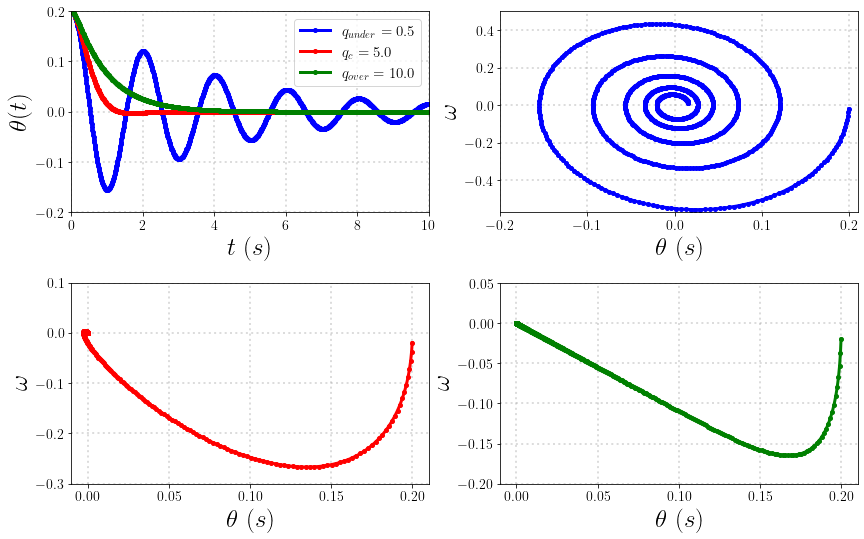

In [14]:
#customizando o gráfico

fig1 = plt.figure(figsize = (13,8))
plt.subplots_adjust(top=0.96, bottom=0.14, left=0.14, right=0.98, wspace=0.2, hspace=0.35)
#subplot(nrows, ncols, index, **kwargs)
ax1 = fig1.add_subplot(2,2,1)
ax2 = fig1.add_subplot(2,2,2)
ax3 = fig1.add_subplot(2,2,3)
ax4 = fig1.add_subplot(2,2,4)

ax1.grid(b=True, which='major', color='DarkGray', alpha=0.4, linestyle=':', linewidth=2)
ax1.set_xlim([0.0,10.0])
ax1.set_ylim([-0.2,0.2])
ax1.set_ylabel("$\\theta(t)$ ",fontsize=25)
ax1.set_xlabel('$t \ (s)$',fontsize=25)
ax1.plot(t,theta,'-o',color='Blue', lw=3, ms=4, markevery=1, label='$q_{under}=0.5$')
ax1.plot(t,theta_c,'-o',color='red', lw=3, ms=4, markevery=1, label='$q_c=5.0$')
ax1.plot(t,theta_o,'-o',color='Green', lw=3, ms=4, markevery=1, label='$q_{over}=10.0$')

ax2.grid(b=True, which='major', color='DarkGray', alpha=0.4, linestyle=':', linewidth=2)
ax2.set_xlim([-0.2,0.21])
ax2.set_ylim([-0.57,0.5])
ax2.set_ylabel("$\\omega$ ",fontsize=25)
ax2.set_xlabel('$\\theta \ (s)$',fontsize=25)
ax2.plot(theta,omega,'-o',color='Blue', lw=3, ms=4, markevery=1, label='$q_{under}=0.50$')

ax3.grid(b=True, which='major', color='DarkGray', alpha=0.4, linestyle=':', linewidth=2)
ax3.set_xlim([-0.01,0.21])
ax3.set_ylim([-0.3,0.1])
ax3.set_ylabel("$\\omega$ ",fontsize=25)
ax3.set_xlabel('$\\theta \ (s)$',fontsize=25)
ax3.plot(theta_c,omega_c,'-o',color='Red', lw=3, ms=4, markevery=1, label='$q_{under}=0.50$')

ax4.grid(b=True, which='major', color='DarkGray', alpha=0.4, linestyle=':', linewidth=2)
ax4.set_xlim([-0.01,0.21])
ax4.set_ylim([-0.2,0.051])
ax4.set_ylabel("$\\omega$ ",fontsize=25)
ax4.set_xlabel('$\\theta \ (s)$',fontsize=25)
ax4.plot(theta_o,omega_o,'-o',color='Green', lw=3, ms=4, markevery=1, label='$q_{under}=0.50$')

legend = ax1.legend(loc='best', shadow=False, fontsize='15')

#plt.savefig('pendulo_amortecido.jpg',dpi=120, orientation='portrait')
plt.show()

## ***Referências***

 [1] *Classical Dynamics of Particles and Systems*, Stephen T. Thornton and Jerry B. Marion. Cengage Learning (2003).
 
 [2] *Stable solutions using the Euler approximation*, Alan Cromer. American Journal of Physics 49, 455 (1981).
 
 [3] *Computation Physics*, Gioradano and Nakanishi. Second ed. chap.2 (2006)]